In [1]:
!pip install sudachipy
!pip install sudachidict_core
!pip install transformers
!pip install tf-keras~=2.16

In [3]:
from sudachipy import tokenizer
from sudachipy import dictionary
from transformers import pipeline
import matplotlib.pyplot as plt

In [5]:
# Sudachiインスタンス作成
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C  # 詳細モード

In [7]:
# テキスト
text = "あなたの発言は非常に失礼で、受け入れられないものです。"

In [9]:
# SudachiPyで形態素解析
tokens = [token.surface() for token in tokenizer_obj.tokenize(text, mode) if token.surface() != ""]
print("形態素解析結果:", tokens)

形態素解析結果: ['あなた', 'の', '発言', 'は', '非常', 'に', '失礼', 'で', '、', '受け入れ', 'られ', 'ない', 'もの', 'です', '。']


In [11]:
# 有害性検出モデル
toxicity_classifier = pipeline("text-classification", model="unitary/toxic-bert")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [13]:
# 感情分析モデル Harassment Detector 4で感情と有害性の逆相関をプロットするため、rinnaを加えました。
sentiment_analyzer = pipeline("sentiment-analysis", model="rinna/japanese-roberta-base")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at rinna/japanese-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [15]:
# スコアリストの準備
toxicity_scores = []
sentiment_scores = []

In [17]:
# 分割された単語ごとに有害性を検出
# スコアリストの準備
toxicity_scores = []
sentiment_scores = []

# 分割された単語ごとに有害性と感情を検出
for token in tokens:
    # 有害性検出
    toxicity_result = toxicity_classifier(token)
    toxicity_score = toxicity_result[0]['score']
    toxicity_scores.append(toxicity_score)
    
    # 感情分析
    sentiment_result = sentiment_analyzer(token)
    sentiment_score = sentiment_result[0]['score'] 
    sentiment_scores.append(sentiment_score)
    
    print(f"単語: {token}")
    print(f"  有害性スコア: {toxicity_score}")
    print(f"  感情スコア: {sentiment_score}")

単語: あなた
  有害性スコア: 0.0007685829768888652
  感情スコア: 0.5331779718399048
単語: の
  有害性スコア: 0.0009658244089223444
  感情スコア: 0.514531135559082
単語: 発言
  有害性スコア: 0.0012355254730209708
  感情スコア: 0.51237553358078
単語: は
  有害性スコア: 0.0009561330662108958
  感情スコア: 0.5019345283508301
単語: 非常
  有害性スコア: 0.011535150930285454
  感情スコア: 0.5270467400550842
単語: に
  有害性スコア: 0.0009511485695838928
  感情スコア: 0.5044114589691162
単語: 失礼
  有害性スコア: 0.011535150930285454
  感情スコア: 0.5097269415855408
単語: で
  有害性スコア: 0.0009430053760297596
  感情スコア: 0.5002087950706482
単語: 、
  有害性スコア: 0.0009492749813944101
  感情スコア: 0.5030701756477356
単語: 受け入れ
  有害性スコア: 0.0013194801285862923
  感情スコア: 0.5038517713546753
単語: られ
  有害性スコア: 0.000767198100220412
  感情スコア: 0.5109787583351135
単語: ない
  有害性スコア: 0.0008037105435505509
  感情スコア: 0.522000253200531
単語: もの
  有害性スコア: 0.0007604753482155502
  感情スコア: 0.5339835286140442
単語: です
  有害性スコア: 0.0007557937642559409
  感情スコア: 0.5038038492202759
単語: 。
  有害性スコア: 0.0009466102346777916
  感情スコア: 0.5103660225868225


In [19]:
# ラインチャートの作成
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [25]:
# CSVファイルに書き込み。使いやすいBIにインポートできるようにするため。IBM cognosでの洞察を想定。
import pandas as pd

# DataFrameの作成
results = pd.DataFrame({
    "形態素": tokens,
    "有害性スコア": toxicity_scores,
    "感情スコア": sentiment_scores
})

# DataFrameの表示
print(results)

# CSVファイルとして保存
results.to_csv("text_analysis_results.csv", index=False, encoding='utf-8')
print("結果が 'text_analysis_results.csv' に保存されました。")

     形態素    有害性スコア     感情スコア
0    あなた  0.000769  0.533178
1      の  0.000966  0.514531
2     発言  0.001236  0.512376
3      は  0.000956  0.501935
4     非常  0.011535  0.527047
5      に  0.000951  0.504411
6     失礼  0.011535  0.509727
7      で  0.000943  0.500209
8      、  0.000949  0.503070
9   受け入れ  0.001319  0.503852
10    られ  0.000767  0.510979
11    ない  0.000804  0.522000
12    もの  0.000760  0.533984
13    です  0.000756  0.503804
14     。  0.000947  0.510366
結果が 'text_analysis_results.csv' に保存されました。


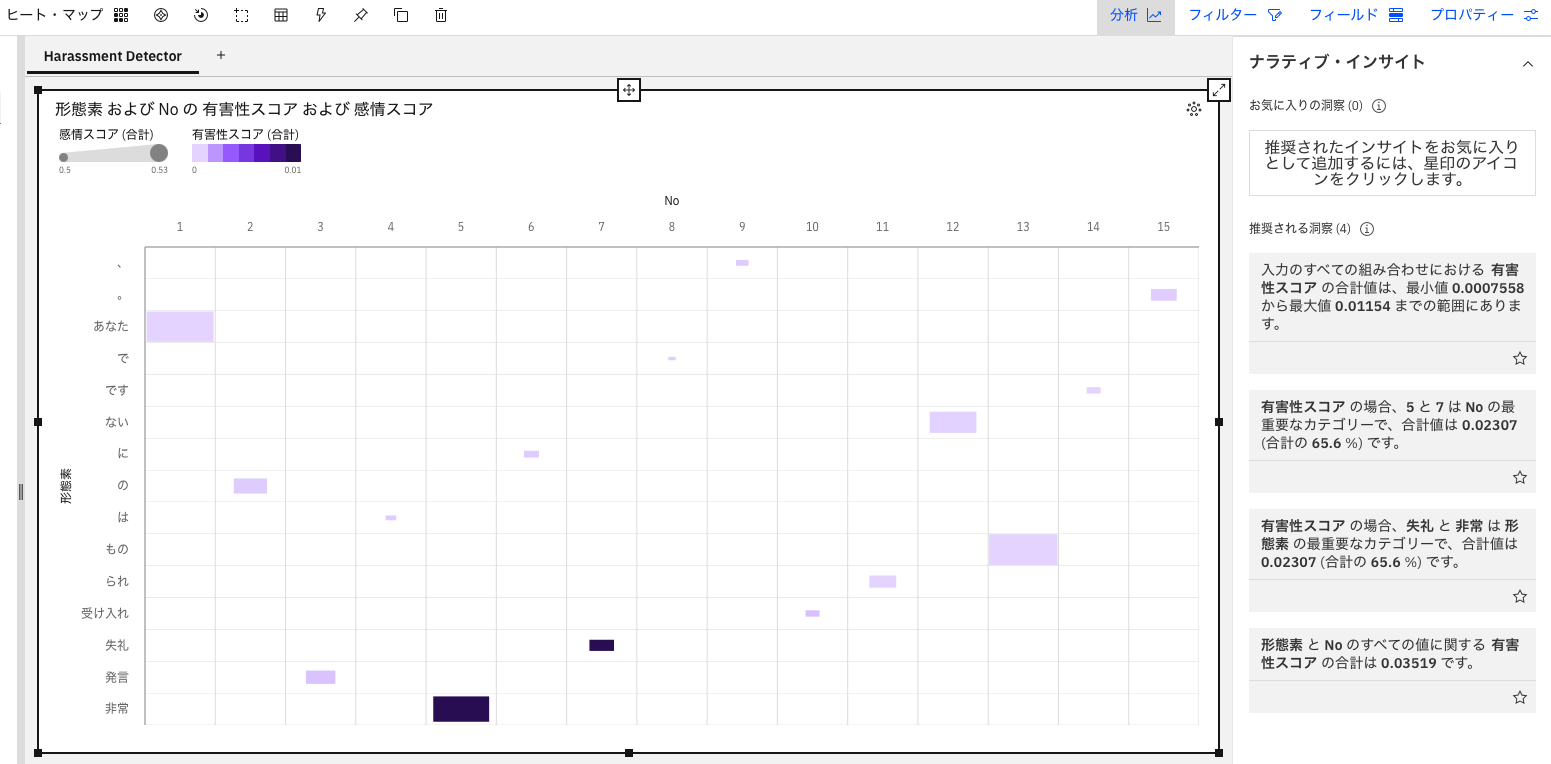

In [1]:
#IBM Cognos ヒートマップ　and Insights
from IPython.display import Image
Image(filename='IBM_Cognos.png')